
# Project Proposal
To begin, we are interested in exploring a dataset from Spotify that contains a little over 32,000 songs. This dataset contains metadata about each song such as their key, loudness, tempo, etc. Our main objective is to see if we can determine the genre of each song based on the various features that each song's metadata provides. We plan on using the K-Nearest Neighbors algorithm to classify/predict each song's genre.  

# Data Collection & Cleaning

# EDA

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("spotify_songs.csv")
df = df.iloc[:,[1,11,12,13,14,15,16,17,18,19,20,21,22]]
df.head()

,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Statistical Analysis
Let's start by first analyzing all of our songs at once. 

We will first begin by calculating the distribution of our data.


In [5]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


Based on this distribution, we can see that the songs have a wide range of each feature.

Let's focus on the tempo for each song for now. 

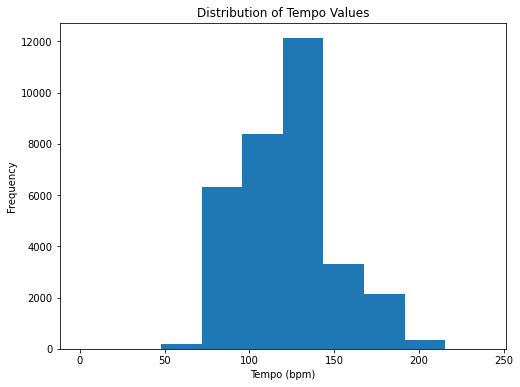

In [38]:
plt.figure(figsize=(8, 6))
df['tempo'].plot(kind='hist')

# Add a title and labels for the x and y axes
plt.title('Distribution of Tempo Values')
plt.xlabel('Tempo (bpm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


We can see that the vast majority of songs will have a tempo of 100 - 150 BPM. The outliers will have a slow tempo that bottoms out at around 50 BPM and the highest will be around 240. 

Next, we can look at speechiness and see if there is anything of interest there.

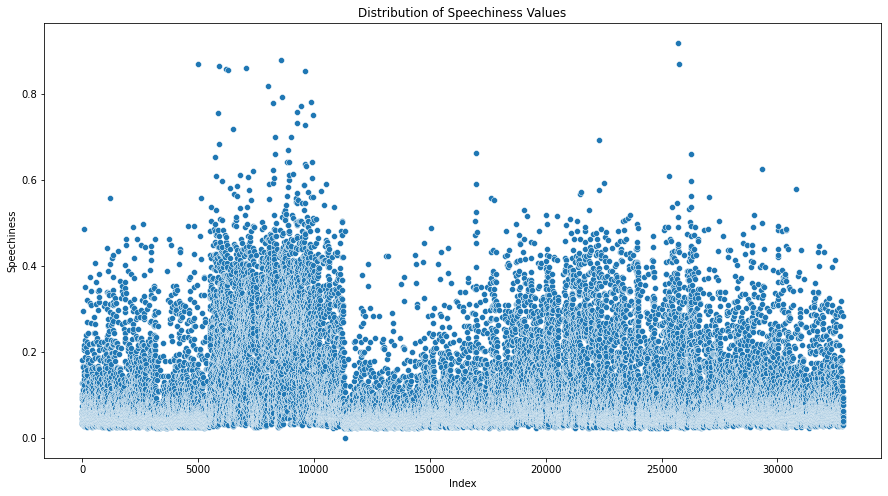

In [34]:
# Create the scatterplot
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df.index, y='speechiness', data=df)

# Add a title and labels for the x and y axes
plt.title('Distribution of Speechiness Values')
plt.xlabel('Index')
plt.ylabel('Speechiness')
# Show the plot
plt.show()

Interestingly enough there is a sharp drop off in speechiness shortly after the 10,000th song. Otherwise, it seems that most songs will have a speechiness of around 0.4 or lower. 

Maybe we will see something if compare the speechiness and the tempo metrics.

<Figure size 1080x576 with 0 Axes>

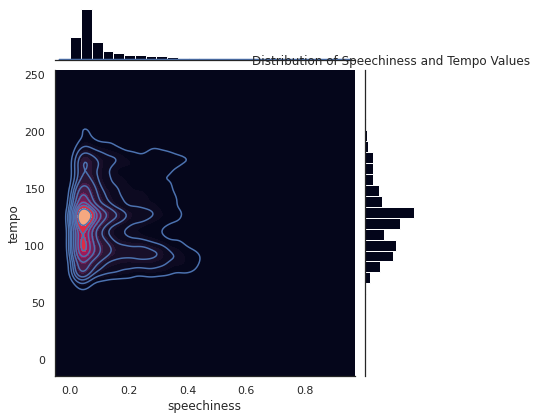

In [55]:
# Create the Smooth Kernel Density plot with marginal histograms
plt.figure(figsize=(15, 8))

sns.set_theme(style="white")
g = sns.jointplot(x='speechiness', y='tempo', data=df, kind='kde')
g.fig.set_facecolor('white')

# Add a title
plt.title('Distribution of Speechiness and Tempo Values')
g.plot_joint(sns.kdeplot,
             fill=True,
             shade=True,
             thresh=0, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

# Show the plot
plt.show()